<a href="https://colab.research.google.com/github/KenshiTanaka/DEEP-Learning/blob/master/GPU%E3%82%92%E4%BD%BF%E7%94%A8%E3%81%9B%E3%81%9A%E3%81%AB%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%81%A7%E9%A1%94%E7%94%BB%E5%83%8F%E3%82%92%E5%88%86%E9%A1%9E%E3%81%99%E3%82%8B%E3%83%AC%E3%82%B7%E3%83%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.23.2 matplotlib==3.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

data

{'DESCR': '.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n

In [ ]:
print(data.images.shape) #顔画像データ
print(data.data.shape)  #顔画像データを1次元に変換したもの
print(data.target.shape) #顔画像データに対する正解ラベル

(400, 64, 64)
(400, 4096)
(400,)


In [ ]:
data.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

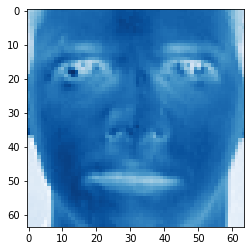

In [ ]:
#数値を画像として出力
import matplotlib.pyplot as plt

plt.imshow(data.images[0], cmap = "Blues") #画像データから指定したカラーで画像を生成
plt.show()#生成したが画像を表示



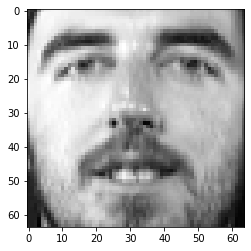

In [ ]:
plt. imshow(data.images[100], cmap = "gray")
plt. show()

In [ ]:
data.target[10]


1

In [ ]:
from sklearn.model_selection import train_test_split #出たセットでサイズを分ける

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, shuffle=True, stratify=data.target, random_state=0)
#shuffle:データをシャッフルする、stratify:層化抽出、random_state:同じ分割結果を得るため、data.data:一次元データ
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(320, 4096)
(80, 4096)
(320,)
(80,)


In [ ]:
from collections import Counter

print(Counter(y_train))


Counter({16: 8, 18: 8, 28: 8, 34: 8, 10: 8, 29: 8, 24: 8, 26: 8, 20: 8, 17: 8, 6: 8, 22: 8, 32: 8, 31: 8, 1: 8, 25: 8, 2: 8, 0: 8, 21: 8, 11: 8, 12: 8, 19: 8, 35: 8, 37: 8, 5: 8, 33: 8, 27: 8, 23: 8, 15: 8, 30: 8, 9: 8, 7: 8, 13: 8, 38: 8, 39: 8, 3: 8, 4: 8, 14: 8, 8: 8, 36: 8})


層化抽出を行うことで各ラベルが8個ずつ似なっている。データを均等に分割することで訓練データとテストデータの偏りをなくすことができる

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0) #random_stateを固定することで同じ結果を得ることができる


In [ ]:
clf.fit(X_train, y_train)
#第一引数に訓練データの特徴量、第二引数に訓練データのデータセット

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)#第一引数にデータセットの特徴量を指定
y_pred


array([ 7, 10, 11, 39, 29, 15, 23, 11, 27, 20,  7,  2,  3, 29, 31, 32,  0,
       29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
       19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 22,  0, 36, 15, 38,
        9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
       33, 24, 26, 13, 14, 38, 10, 32, 37,  1, 14, 24])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
#関数sklearn.metrics.accuracy_scoreは第一引数派テストデータセットの正解ラベル、第二引数に予測を指定

0.925

混同行列とはあるデータを分類したときに正解、不正解の　数を整理する表のこと

真陽性(True Positive)
判断したいもの以外を以外と正しく判別できた数

真陰性(True Negative)
判別したいもの以外を正しいときに正しく判別した数

偽陽性(False Positive)
判別したいもの以外を正しく正しく判別できなかった数

偽陰性(False Negative)
判別したいものを判別できなかった数

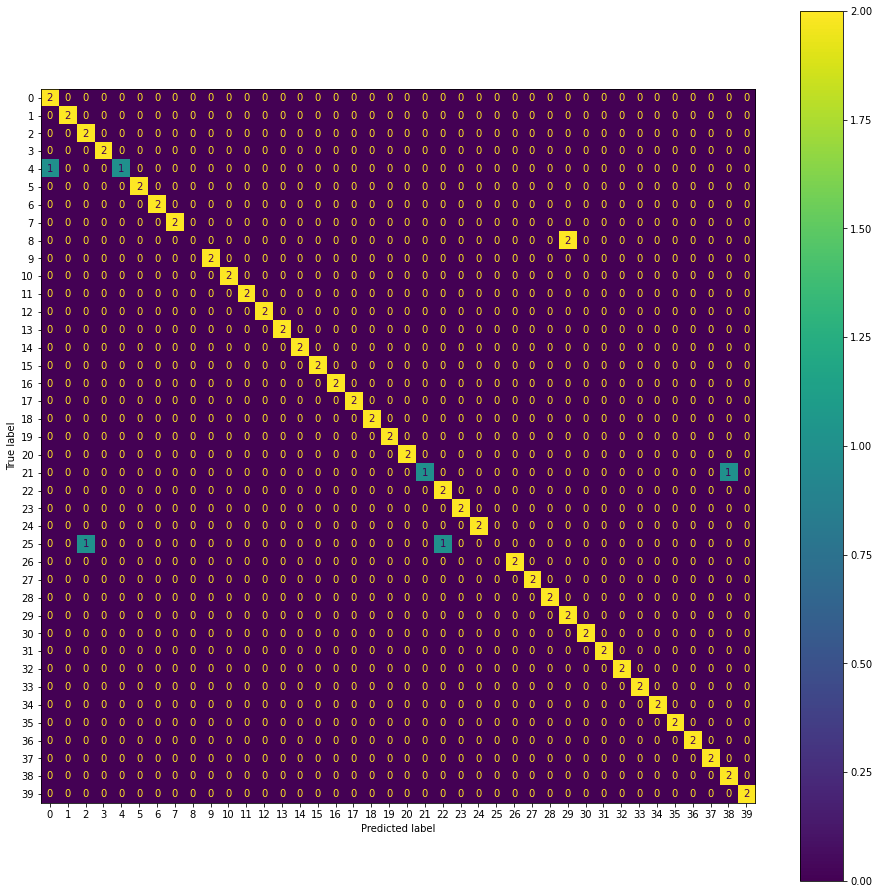

In [ ]:
#混同行列(Confusion Matrix)
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(16, 16))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()


このコマンドのポイントは次の3点です。

関数plt.subplotsの第一引数に図を描画する範囲のサイズを指定します
関数plot_confusion_matrixの第一引数に分類器、第二引数にテストデータの画像データ、第三引数にテストデータの正解ラベル、第四引数に図を描画する範囲を指定します
関数matplotlib.pyplot.showを使用すると、生成した画像を表示します
正解ラベルが8の画像データを2つとも29に誤分類していること、また25の画像データのうち1つを2、もう1つを22に誤分類していることがわかります。このように混同行列を出力することで、モデルの分類結果を視覚的に理解することができます。

In [1]:
!git config --global user.name KenshiTanaka
!git config --global user.email 1911140064f@ed.fuk.kindai.ac.jp


In [4]:
!git push origin master

fatal: not a git repository (or any of the parent directories): .git
